# WEB SCRAPPING - BEAUTIFULSOUP

## Webpage

Gather data from webpage https://books.toscrape.com

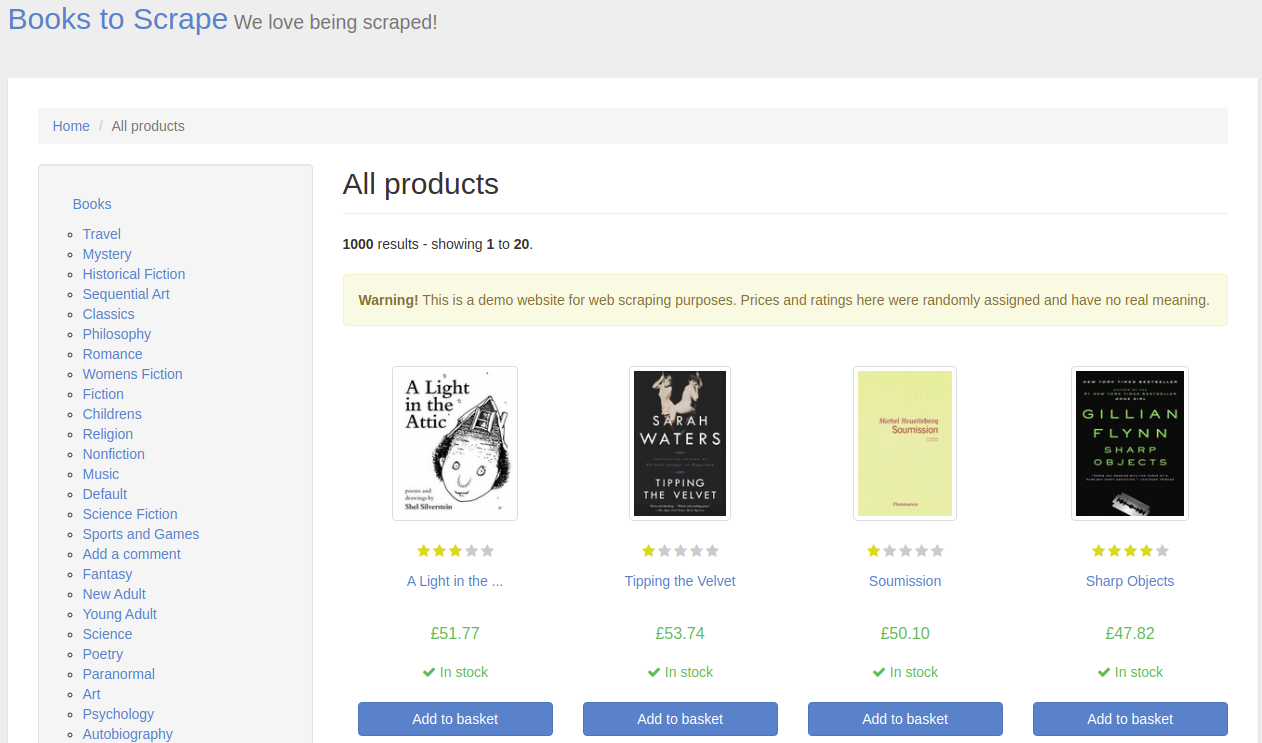

## Data to collect

Gather information bellow from **each book**:
<ul>
<li> Category: Classics, Science Fiction, Humor and Business</li>
<li> Book name</li>
<li> Price</li>
<li> Rating</li>
<li> Availablity</li>
<li> Date/Time of scrapping</li>
</ul>

## Deliverables

1. Create a solution plan with:

<ul>
    <li><b>Output:</b> simulation of table and graphic</li>
    <li><b>Process:</b> workflow to develop the solution</li>
    <li><b>Input:</b> link of data source</li>
<ul>

2. Create a CSV file with all data.

# Solution Plan

## Output

Delivery a csv with 6 columns as bellow in order to allow business team to analyse as graphics samples.

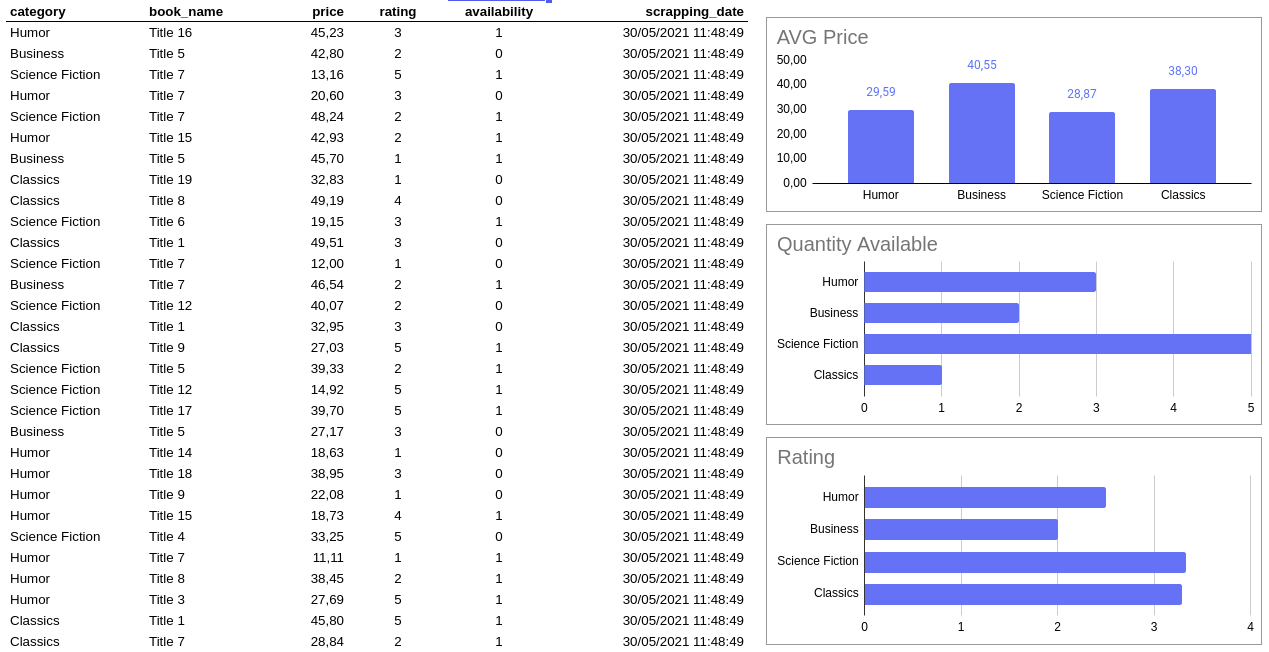

## Process

1. Libraries necessary:

 * <b>Requests</b>: get the html code from webpage
 * <b>BeautifulSoup</b>: collect data from html
 * <b>Pandas and Numpy</b>: data manipulation
 * <b>DateTime</b>: add date and time of scrapping
</ul> <br<br>
 


2. Steps:<br>
     1. Navegate throw categories pages<br>
     2. Collect html of each page with all books available<br>
     3. Collect info (book name, price, rating, availability)
     4. Add date and time of scrapping
     5. Merge all data into one Data Frame
     6. Export Data Frame to CSV File

## Input

Using Google Chrome is possible to inspect and analyse the HTML code of webpage. Then we can sellect the specific information we need using BeautifulSoup.

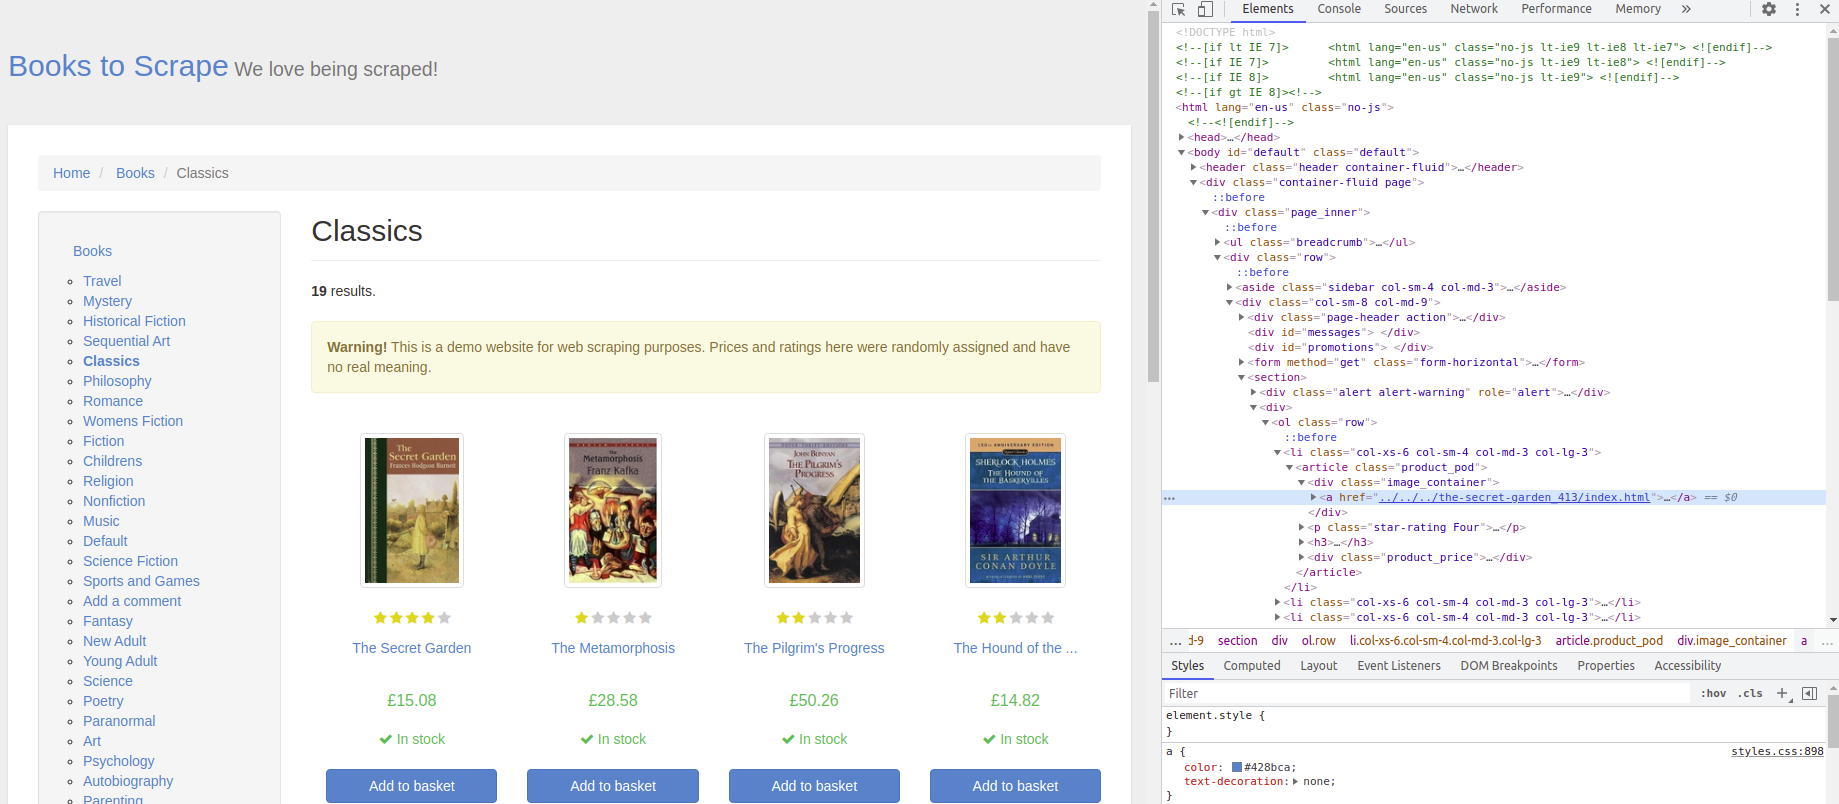

# Enviroment

## Import Libraries

In [1]:
import requests
import re

import pandas as pd
import numpy as np
import seaborn as sns

from bs4 import BeautifulSoup
from datetime import datetime

from IPython.display import HTML
from matplotlib import pyplot as plt

## Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()



def get_parser_url ( url ):
    headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    page = requests.get( url, headers=headers)
   
    return BeautifulSoup( page.text, 'html.parser')
        

    
def get_book_info (book_link):

    # getting product informatio table
    k,v = [ x.string for x in get_parser_url ( book_link ).find_all('th') ], [ x.string for x in get_parser_url ( book_link ).find_all('td') ]
    dic={}

    for key, value in zip(k,v):
        dic[key]=value
        
    # getting information from table
    book_info = pd.DataFrame.from_dict(dict([ (k,pd.Series(v)) for k,v in dic.items() ]))
    
    # getting rating
    book_info['rating'] = get_parser_url( book_link ).find("p", class_ = re.compile("star-rating")).get("class")[1]
   
    # adding book link column to merge futher
    book_info['link'] = book_link
    
    # adding book title
    book_info['title'] = get_parser_url ( book_link ).h1.text
    
    return book_info
    
    

Populating the interactive namespace from numpy and matplotlib


/home/samuel/.pyenv/versions/3.9.0/envs/DevPython/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [47]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Data Collecting

## Getting Category and books link

In [3]:
# URL by category

category = pd.DataFrame(['classics_6', 'science-fiction_16','humor_30','business_35'])
category.columns = ['category']

books = pd.DataFrame()

for i in range(0,len(category)):
    
    #getting link by category
    link_category = 'http://books.toscrape.com/catalogue/category/books/' + category.loc[i][0] + '/index.html'
    soup = get_parser_url( link_category )
    
    #getting books link by category
    cat = [x.get_text().replace('\n','') for x in soup.find_all('div', class_ = 'page-header action')]
    links = [x.div.a.get('href').replace("../../../", "http://books.toscrape.com/catalogue/") for x in soup.find_all('article', class_ = 'product_pod')]
    dic = {'category': cat, 'link': links}
    
    #appending links
    aux = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dic.items() ])).fillna(method='ffill')
    books = books.append(aux)


books = books.reset_index(drop=True)



## Getting books information

In [4]:
book_info = pd.DataFrame()

for i in range(0,len(books)):
    book_info = book_info.append( get_book_info ( books['link'][i]) )
    
    
books = pd.DataFrame.merge(books, book_info[['title','Price (excl. tax)','Availability','rating','UPC','link']], on='link', how = 'left')
 
# insert date time
books['scrape_date'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S' )
books['scrape_date'] = pd.to_datetime( books['scrape_date'], format='%Y-%m-%d %H:%M:%S' )



# Data preparaiton

In [5]:
df1 = books[['category', 'title', 'Price (excl. tax)', 'Availability','rating','scrape_date']].copy()

In [6]:
df1.columns = ['category', 'title', 'price', 'availability','rating','scrape_date']
df1.head()

category                                              title    price            availability rating         scrape_date
0  Classics                                  The Secret Garden  Â£15.08  In stock (5 available)   Four 2021-06-04 07:10:31
1  Classics                                  The Metamorphosis  Â£28.58  In stock (5 available)    One 2021-06-04 07:10:31
2  Classics                             The Pilgrim's Progress  Â£50.26  In stock (4 available)    Two 2021-06-04 07:10:31
3  Classics  The Hound of the Baskervilles (Sherlock Holmes...  Â£14.82  In stock (4 available)    Two 2021-06-04 07:10:31
4  Classics                     Little Women (Little Women #1)  Â£28.07  In stock (4 available)   Four 2021-06-04 07:10:31

In [7]:
# changing price
df1['price'] = df1['price'].apply(lambda x: x.replace('Â£', ''))
df1['price'] = df1['price'].apply(lambda x: float(x))

# getting available quantity
df1['availability'] = df1['availability'].apply(lambda x: re.findall(r'\b\d+\b',x)[0])
df1['availability'] = df1['availability'].apply(lambda x: int(x))

# rating
df1['rating'] = df1['rating'].apply( lambda x: 1 if x=='One' else ( 2 if x=='Two' else (3 if x=='Three' else 4)))



In [8]:
df1.dtypes

category                object
title                   object
price                  float64
availability             int64
rating                   int64
scrape_date     datetime64[ns]
dtype: object

# Output

In [9]:
df1.sample(10)

category                                              title  price  availability  rating         scrape_date
11         Classics                                            Beowulf  38.35             3       2 2021-06-04 07:10:31
13         Classics                          The Story of Hong Gildong  43.19             1       4 2021-06-04 07:10:31
10         Classics  The Complete Stories and Poems (The Works of E...  26.78             3       4 2021-06-04 07:10:31
32  Science Fiction        Three Wishes (River of Time: California #1)  44.18             1       2 2021-06-04 07:10:31
34  Science Fiction  Having the Barbarian's Baby (Ice Planet Barbar...  34.96             1       4 2021-06-04 07:10:31
22  Science Fiction                                        The Project  10.65            15       1 2021-06-04 07:10:31
23  Science Fiction                                    Soft Apocalypse  26.12            15       2 2021-06-04 07:10:31
44            Humor                                    Holidays on Ice  51.07             3       2 2021-06-04 07:10:31
17         Classics                                               Emma  32.93             1       2 2021-06-04 07:10:31
28  Science Fiction                                   Ready Player One  19.07             3       4 2021-06-04 07:10:31

## CSV Output

In [10]:
df1.to_csv('books_list.csv')

## Plotting

In [12]:
# AVG Price
avg_price = df1[['category','price']].groupby('category').mean().reset_index()

# Qty Available
total_qty = df1[['category','availability']].groupby('category').sum().reset_index()
aux = pd.merge(avg_price, total_qty, on='category', how='left')

# AVG Rating
avg_rating = df1[['category','rating']].groupby('category').mean().reset_index()
summary = pd.merge(aux, avg_rating, on='category', how='left')

summary.columns = ['category', 'avg_price','qty','avg_rating']
summary

category  avg_price  qty  avg_rating
0         Business  32.460000  133    2.666667
1         Classics  36.545263   55    2.473684
2            Humor  33.501000   84    3.000000
3  Science Fiction  33.802500  125    2.187500

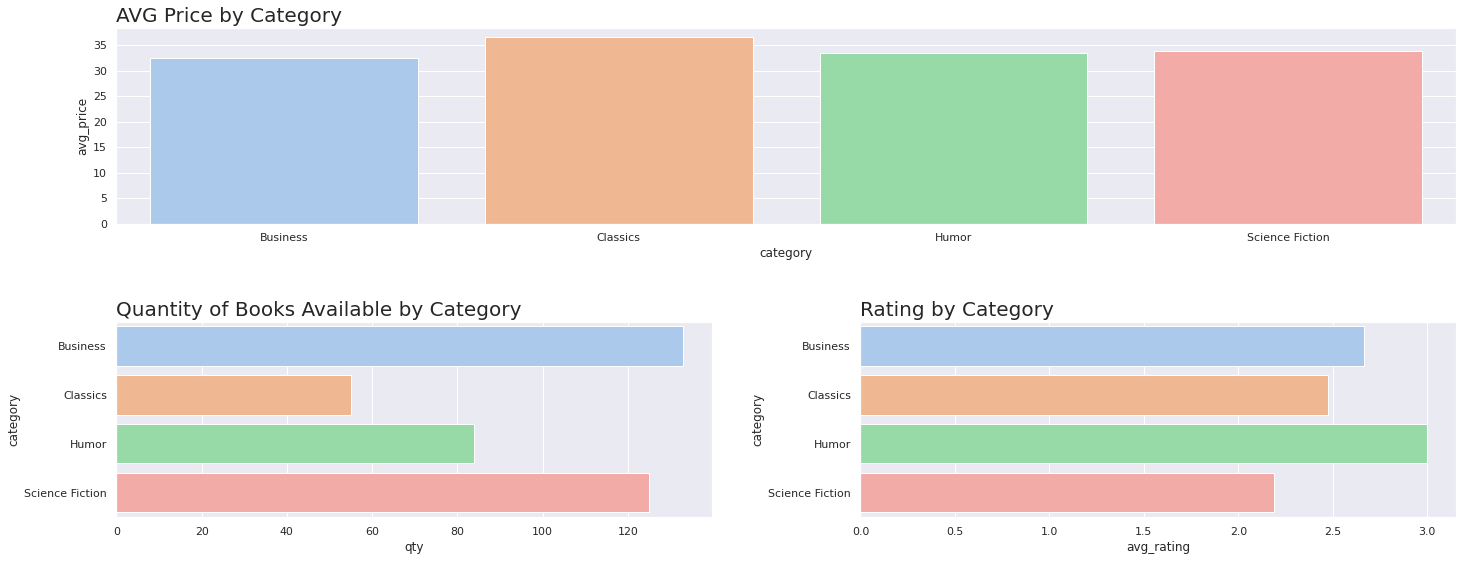

In [87]:
sns.set(font_scale = 1)

plt.subplot(2,1,1)
sns.barplot(x= 'category', y='avg_price', data=summary, palette = 'pastel');
plt.title("AVG Price by Category", loc = 'left', fontsize=20)

plt.subplot(2,2,3)
sns.barplot(x='qty',y='category', data=summary,  palette = 'pastel');
plt.title("Quantity of Books Available by Category", loc = 'left', fontsize=20)

plt.subplot(2,2,4)
sns.barplot(x='avg_rating',y='category', data=summary,  palette = 'pastel')
plt.title("Rating by Category", loc = 'left', fontsize=20)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.5)